### This python file chooses TFIDF vectorization
### There  is another file using BoW vectorization

### Data Preprocessing

In [1]:
import pandas as pd

train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

In [2]:
#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

#check the result
print("Train length:",len(X_train_raw))

#separating instance and label for Test
X_test_raw = [x[0] for x in test_data[['text']].values]

#check the result
print("Test length:",len(X_test_raw))

Train length: 21802
Test length: 6099


In [3]:
# A cleaning function to get rid of words with low analyzing values
# Keep the necessary texts only to make the analysis efficient and reliable

from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
import contractions

nlp = spacy.load('en_core_web_md')

# exclude words from spacy stopwords list
deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False


def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text


def text_preprocessing(text, accented_chars=True, contractions=True, 
                       convert_num=True, extra_whitespace=True, 
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_html=True, remove_num=True, special_chars=True, 
                       stop_words=True):
    """preprocess text with default option set to true for all steps"""
    if remove_html == True: #remove html tags
        text = strip_html_tags(text)
    if extra_whitespace == True: #remove extra whitespaces
        text = remove_whitespace(text)
    if accented_chars == True: #remove accented characters
        text = remove_accented_chars(text)
    if contractions == True: #expand contractions
        text = expand_contractions(text)
    if lowercase == True: #convert all characters to lowercase
        text = text.lower()

    doc = nlp(text) #tokenise text

    clean_text = []
    
    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        if stop_words == True and token.is_stop and token.pos_ != 'NUM': 
            flag = False
        # remove punctuations
        if punctuations == True and token.pos_ == 'PUNCT' and flag == True: 
            flag = False
        # remove special characters
        if special_chars == True and token.pos_ == 'SYM' and flag == True: 
            flag = False
        # remove numbers
        if remove_num == True and (token.pos_ == 'NUM' or token.text.isnumeric()) \
        and flag == True:
            flag = False
        # convert number words to numeric numbers
        if convert_num == True and token.pos_ == 'NUM' and flag == True:
            edit = w2n.word_to_num(token.text)
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        # append tokens edited and not removed to list 
        if edit != "" and flag == True:
            clean_text.append(edit)        
    return clean_text

In [4]:
# Use the function defined above to clean X_train_raw and X_test_raw

X_train_clean = []
for curr_text in X_train_raw:
    cleaned_text = text_preprocessing(curr_text, accented_chars=True, contractions=True, 
                       convert_num=True, extra_whitespace=True, 
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_html=True, remove_num=True, special_chars=True, 
                       stop_words=True)
    X_train_clean.append(" ".join(cleaned_text))
    
X_test_clean = []
for curr_text in X_test_raw:
    cleaned_text = text_preprocessing(curr_text, accented_chars=True, contractions=True, 
                       convert_num=True, extra_whitespace=True, 
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_html=True, remove_num=True, special_chars=True, 
                       stop_words=True)
    X_test_clean.append(" ".join(cleaned_text))

C:\Users\643944.STUDENT\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# the ratio of test_data on train_data is approximately 0.28
X_sub_train, X_valid, Y_sub_train, Y_valid = train_test_split(X_train_clean, Y_train, test_size=0.28)

### This python file chooses TFIDF vectorization
### There  is another file using BoW vectorization

### 2. TFIDF
In this approach, we use the **TfidfVectorizer** library to separate all the words in this corpus (dataset). Same as the BoW approach, these words are then used as the 'vectors' or 'features' to represent each instance (Tweet).

However, in this method for each instance the value associated with each 'vector' (word) is not the number of times the word repeated in that tweet, but the TFIDF value of then 'voctor' (word).

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sub_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

print("Train feature space size (using TFIDF):",X_train_tfidf.shape)
print("Validation feature space size (using TFIDF):",X_valid_tfidf.shape)
print("Test feature space size (using TFIDF):",X_test_tfidf.shape)

Train feature space size (using TFIDF): (15697, 30795)
Validation feature space size (using TFIDF): (6105, 30795)
Test feature space size (using TFIDF): (6099, 30795)


In [8]:
#Let's see one example tweet using the TFIDF feature space
print(X_train_tfidf[1])

  (0, 12117)	0.238440836825062
  (0, 28257)	0.24706352657129854
  (0, 29790)	0.22669248066719974
  (0, 26543)	0.39751621077400817
  (0, 29128)	0.17979520784927566
  (0, 23131)	0.29227411737861403
  (0, 28268)	0.337535606302446
  (0, 23922)	0.25091023358638864
  (0, 17947)	0.18206462841255977
  (0, 29800)	0.34223263698072587
  (0, 12493)	0.2435554490034625
  (0, 12769)	0.24313786750334185
  (0, 16095)	0.1573091387157878
  (0, 8261)	0.2908747222554002


### Feature Selection

In [50]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0001)
X_var_train = selector.fit_transform(X_train_tfidf)
print(X_var_train.shape)
X_var_valid = selector.transform(X_valid_tfidf)
print(X_var_valid.shape)
X_var_test = selector.transform(X_test_tfidf)
print(X_var_test.shape)

(15697, 1680)
(6105, 1680)
(6099, 1680)


### Models Selection

0-R Baseline model

In [11]:
# Baseline model: Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

model = DummyClassifier(strategy='most_frequent').fit(X_var_train, Y_sub_train)

Y_train_predicted = model.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

lr_acc = np.mean(cross_val_score(model, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', lr_acc)

Training accuracy:  0.5796011976810855
Validation accuracy:  0.5832923832923833


Logistic Regression

In [55]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression(solver='sag', multi_class='multinomial',C=0.8, max_iter=200).fit(X_var_train, Y_sub_train)

Y_train_predicted = lr.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

lr_acc = np.mean(cross_val_score(lr, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', lr_acc)

Training accuracy:  0.68943110148436
Validation accuracy:  0.6422604422604422


In [56]:
LR_label = lr.predict(X_var_test)
kaggle_label = {"id": test_data.id, "sentiment": LR_label}

output_pd = pd.DataFrame(kaggle_label)
output_pd.to_csv('tfidf_var.csv', index=False)

Support Vector Machine

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.1).fit(X_var_train, Y_sub_train)

Y_train_predicted = svm.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

svm_acc = np.mean(cross_val_score(svm, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', svm_acc)

Training accuracy:  0.6054660126138752
Validation accuracy:  0.585913185913186


Random Forest

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 12,
    max_features = 'log2',
    min_samples_leaf = 1,
    min_samples_split = 5,
    n_estimators = 90,
    random_state = 6,
)
clf_rf.fit(X_var_train, Y_sub_train)

Y_train_predicted_rf = clf_rf.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

clf_rf_acc = np.mean(cross_val_score(clf_rf, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', clf_rf_acc)

Training accuracy:  0.6054660126138752
Validation accuracy:  0.5832923832923833


### Evaluation

In [51]:
# Baseline model: Dummy Classifier
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# record time start running the model
t0 = time.time()

# 0-R Baseline model
baseline = DummyClassifier(strategy='most_frequent').fit(X_var_train, Y_sub_train)

# record time finished then minus the initial time to get the time consumed
t1 = time.time() - t0
print("Execution time of 0-R Baseline model classifier: {} s".format(round(t1,3)))

Y_train_predicted = baseline.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

baseline_acc = np.mean(cross_val_score(baseline, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', baseline_acc)

# baseline_label = baseline.predict(X_var_test)
# print(baseline_label.shape)

Y_valid_predicted = baseline.predict(X_var_valid)

# Compute Macro metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Precision: %f' % precision)

# Recall = TP / (TP + FN)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Recall: %f' % recall)

# F1 = 2 TP / (2 TP + FP + FN)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro F1 score: %f' % f1)

# Compute Weighted metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Precision: %f' % precision)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Recall: %f' % recall)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted F1 score: %f' % f1)

Execution time of 0-R Baseline model classifier: 0.014 s
Training accuracy:  0.5796011976810855
Validation accuracy:  0.5832923832923833
Macro Precision: 0.194431
Macro Recall: 0.333333
Macro F1 score: 0.245603
Weighted Precision: 0.340230
Weighted Recall: 0.583292
Weighted F1 score: 0.429775


C:\Users\643944.STUDENT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\643944.STUDENT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# record time start running the model
t0 = time.time()

# Logestic Regression
lr = LogisticRegression(solver='sag', multi_class='multinomial',C=0.8, max_iter=200).fit(X_var_train, Y_sub_train)

# record time finished then minus the initial time to get the time consumed
t1 = time.time() - t0
print("Execution time of logistic regression classifier: {} s".format(round(t1,3)))

Y_train_predicted = lr.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

lr_acc = np.mean(cross_val_score(lr, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', lr_acc)

LR_label = lr.predict(X_var_test)

Y_valid_predicted = lr.predict(X_var_valid)

# Compute Macro metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Precision: %f' % precision)

# Recall = TP / (TP + FN)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Recall: %f' % recall)

# F1 = 2 TP / (2 TP + FP + FN)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro F1 score: %f' % f1)

# Compute Weighted metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Precision: %f' % precision)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Recall: %f' % recall)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted F1 score: %f' % f1)

Execution time of logistic regression classifier: 0.256 s
Training accuracy:  0.68943110148436
Validation accuracy:  0.6422604422604422
Macro Precision: 0.623708
Macro Recall: 0.513631
Macro F1 score: 0.536931
Weighted Precision: 0.640205
Weighted Recall: 0.650123
Weighted F1 score: 0.621985


In [54]:
# SVM
from sklearn.svm import SVC

# record time start running the model
t0 = time.time()

# SVM 
svm = SVC(kernel='linear', C=0.1).fit(X_var_train, Y_sub_train)

# record time finished then minus the initial time to get the time consumed
t1 = time.time() - t0
print("Execution time of SVM classifier: {} s".format(round(t1,3)))

Y_train_predicted = svm.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

svm_acc = np.mean(cross_val_score(svm, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', svm_acc)

# LR_label = lr.predict(X_var_test)
# print(LR_label.shape)

Y_valid_predicted = svm.predict(X_var_valid)

# Compute Macro metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Precision: %f' % precision)

# Recall = TP / (TP + FN)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Recall: %f' % recall)

# F1 = 2 TP / (2 TP + FP + FN)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro F1 score: %f' % f1)

# Compute Weighted metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Precision: %f' % precision)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Recall: %f' % recall)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted F1 score: %f' % f1)

Execution time of SVM classifier: 37.814 s
Training accuracy:  0.6006880295597885
Validation accuracy:  0.5854217854217854
Macro Precision: 0.636986
Macro Recall: 0.374669
Macro F1 score: 0.326955
Weighted Precision: 0.635876
Weighted Recall: 0.609992
Weighted F1 score: 0.493783


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# record time start running the model
t0 = time.time()

# Random Forest model
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 12, max_features = 'auto',
    min_samples_leaf = 1, min_samples_split = 3, n_estimators = 100, random_state = 6).fit(X_var_train, Y_sub_train)


# record time finished then minus the initial time to get the time consumed
t1 = time.time() - t0
print("Execution time of Random Forest classifier: {} s".format(round(t1,3)))

Y_train_predicted = rf.predict(X_var_train)
print('Training accuracy: ', np.mean(Y_train_predicted == Y_sub_train))

rf_acc = np.mean(cross_val_score(rf, X_var_valid, Y_valid, cv=5))
print('Validation accuracy: ', rf_acc)

# LR_label = lr.predict(X_var_test)
# print(LR_label.shape)

Y_valid_predicted = rf.predict(X_var_valid)

# Compute Macro metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Precision: %f' % precision)

# Recall = TP / (TP + FN)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro Recall: %f' % recall)

# F1 = 2 TP / (2 TP + FP + FN)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'macro')
print('Macro F1 score: %f' % f1)

# Compute Weighted metrics of the classifier
precision = precision_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Precision: %f' % precision)
recall = recall_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted Recall: %f' % recall)
f1 = f1_score(Y_valid, Y_valid_predicted, average = 'weighted')
print('Weighted F1 score: %f' % f1)

Execution time of Random Forest classifier: 1.373 s
Training accuracy:  0.5901764668407976
Validation accuracy:  0.5906633906633906
Macro Precision: 0.811972
Macro Recall: 0.346160
Macro F1 score: 0.273080
Weighted Precision: 0.722225
Weighted Recall: 0.591810
Weighted F1 score: 0.451233


### Error Analysis

C:\Users\643944.STUDENT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


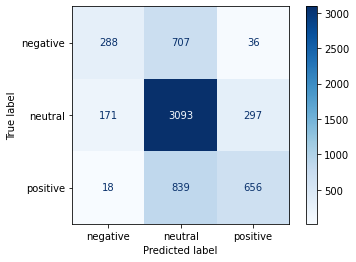

In [30]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_var_valid, Y_valid, cmap=plt.cm.Blues)
plt.show()